In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("ParisHousing.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [4]:
x=df.drop("price",axis=1)
y=df["price"]


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([7958745.676, 3710592.009, 8553100.113, ..., 1953467.298,
       2944941.353, 7037593.838], shape=(2000,))

In [8]:
r_score=r2_score(y_pred,y_test)
r_score


0.9999981755552642

In [9]:
mse=mean_squared_error(y_pred,y_test)
print(mse)
rmsc=np.sqrt(mse)
rmsc

15978695.484096497


np.float64(3997.336048432318)

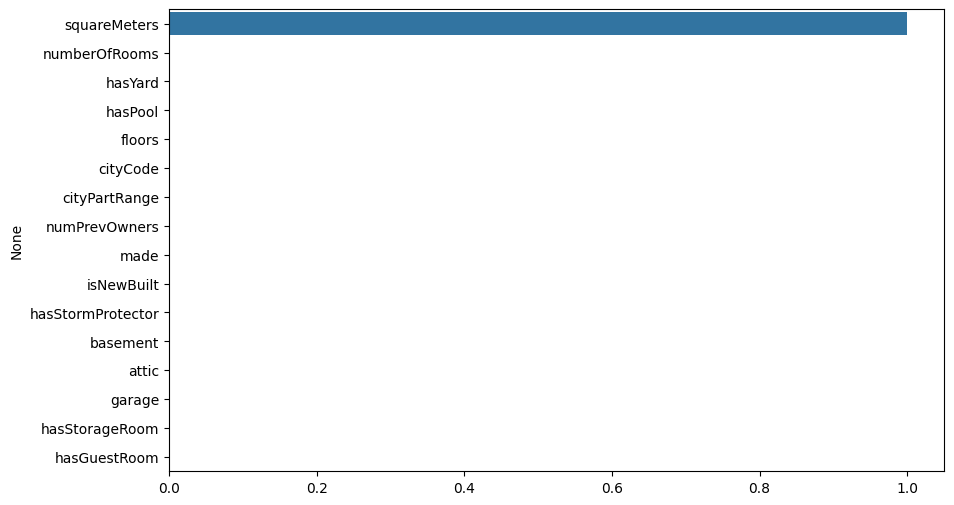

In [10]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [11]:
new_data=pd.DataFrame({
    "squareMeters":[1272],
    "numberOfRooms":[34],
    "hasYard":[1],
    "hasPool":[1],
    "floors":[34],
    "cityCode":[80933],
    "cityPartRange":[4],
    "numPrevOwners":[4],
    "made":[1994],
    "isNewBuilt":[2],
    "hasStormProtector":[1],
    "basement":[8304],
    "attic":[4321],
    "garage":[123],
    "hasStorageRoom":[1],
    "hasGuestRoom":[2],

})
predict=model.predict(new_data)
predict

array([128204.09])